## Importing all the neccesary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
plt.style.use("ggplot")
from matplotlib.pyplot import figure 
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [57]:
df = pd.read_csv("movies.csv")

In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Dropping missing values

In [59]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [60]:
df.shape

(7668, 15)

In [61]:
df.dropna(axis=0,inplace = True)

In [62]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## Checking Data Types

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [64]:
df['budget'] = df['budget'].astype("int64")
df['gross'] = df['gross'].astype("int64")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [66]:
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [67]:
for i in range(len(df['year'])):
    if df.iloc[i,15].isdigit():
        continue
    else:
        print(df.iloc[i,15],i)

Augu 251
Marc 256
May  634
May  756
Janu 993
Nove 1109
Sept 1305
May  1306
Nove 4057


In [68]:
temp_df = df

In [69]:
temp_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [70]:
temp_df.set_index("released",inplace = True)

In [71]:
for i in temp_df.index:
    if re.search(",",i):
        continue
    else:
        print(i)

1982 (Japan)
August 1983 (United States)
March 1985 (United States)
1985 (United States)
1987 (United States)
May 1988 (United Kingdom)
May 1988 (United States)
January 1991 (United States)
November 1991 (United States)
September 1994 (United States)
May 1994 (United States)
1995 (Iran)
2019 (United States)
November 2010 (Australia)


In [72]:
for i in temp_df.index:
    if re.search(",",i):
        continue
    else:
        temp_df.drop(i,axis = 0, inplace = True)

In [73]:
temp_df.reset_index(inplace=True)

In [74]:
temp_df['yearcorrect'] = temp_df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [75]:
temp_df

,released,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,"June 13, 1980 (United States)",The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,"July 2, 1980 (United States)",The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,"June 20, 1980 (United States)",Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,"July 2, 1980 (United States)",Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,"July 25, 1980 (United States)",Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,"January 17, 2020 (United States)",Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
5403,"February 14, 2020 (United States)",Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
5404,"January 17, 2020 (United States)",Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
5405,"February 21, 2020 (United States)",The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [76]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   released     5407 non-null   object 
 1   name         5407 non-null   object 
 2   rating       5407 non-null   object 
 3   genre        5407 non-null   object 
 4   year         5407 non-null   int64  
 5   score        5407 non-null   float64
 6   votes        5407 non-null   float64
 7   director     5407 non-null   object 
 8   writer       5407 non-null   object 
 9   star         5407 non-null   object 
 10  country      5407 non-null   object 
 11  budget       5407 non-null   int64  
 12  gross        5407 non-null   int64  
 13  company      5407 non-null   object 
 14  runtime      5407 non-null   float64
 15  yearcorrect  5407 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 676.0+ KB


In [77]:
temp_df["yearcorrect"]=temp_df["yearcorrect"].astype("int64")

In [78]:
temp_df["yearcorrect"].equals("year")

False

In [79]:
for i in range(len(temp_df["yearcorrect"])):
    if temp_df.iloc[i,4]!=temp_df.iloc[i,15]:
        print(i)

8
11
19
24
43
44
48
59
67
68
77
78
88
91
96
97
115
116
120
133
137
139
142
156
157
162
186
203
206
213
219
223
228
247
279
292
301
309
321
326
336
341
351
359
364
380
384
405
412
418
445
452
460
477
495
500
519
523
525
545
555
558
601
612
620
624
635
646
650
651
657
667
668
675
678
685
686
696
699
706
711
729
733
740
764
785
786
794
812
839
843
851
858
872
879
897
909
918
923
933
958
967
970
974
975
981
985
1002
1022
1037
1046
1055
1067
1068
1071
1078
1079
1113
1127
1133
1139
1147
1148
1158
1162
1165
1168
1179
1183
1191
1209
1215
1221
1223
1226
1231
1237
1241
1253
1257
1261
1298
1302
1305
1306
1312
1318
1319
1337
1341
1343
1346
1355
1356
1365
1367
1368
1382
1402
1416
1428
1437
1441
1443
1446
1447
1452
1455
1463
1464
1477
1485
1490
1491
1516
1517
1521
1544
1557
1559
1573
1575
1590
1592
1603
1606
1612
1614
1649
1661
1672
1677
1694
1696
1697
1710
1711
1717
1724
1727
1729
1737
1747
1773
1786
1787
1830
1846
1848
1855
1858
1863
1874
1877
1883
1890
1893
1895
1897
1900
1911
1912
1918
1949
1953

In [80]:
temp_df.head(20)

,released,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,"June 13, 1980 (United States)",The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,"July 2, 1980 (United States)",The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,"June 20, 1980 (United States)",Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,"July 2, 1980 (United States)",Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,"July 25, 1980 (United States)",Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,"May 9, 1980 (United States)",Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,"June 20, 1980 (United States)",The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,"December 19, 1980 (United States)",Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,"June 19, 1981 (United States)",Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,"May 16, 1980 (United States)",The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [81]:
df=temp_df

In [82]:
df.drop("year",axis = 1 , inplace=True)

In [83]:
df.head()

,released,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,"June 13, 1980 (United States)",The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,"July 2, 1980 (United States)",The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,"June 20, 1980 (United States)",Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,"July 2, 1980 (United States)",Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,"July 25, 1980 (United States)",Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [84]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,released,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
3718,"December 18, 2009 (United States)",Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
5288,"April 26, 2019 (United States)",Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
1783,"December 19, 1997 (United States)",Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
4716,"December 18, 2015 (United States)",Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
5144,"April 27, 2018 (United States)",Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,"January 15, 2015 (Sweden)",Tanner Hall,R,Drama,5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
1367,"June 4, 1994 (South Korea)",Philadelphia Experiment II,PG-13,Action,4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
2274,"May 11, 2001 (Canada)",Ginger Snaps,Not Rated,Drama,6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
154,"March 12, 1982 (United States)",Parasite,R,Horror,3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


## Scatterplot budget vs gross_rev

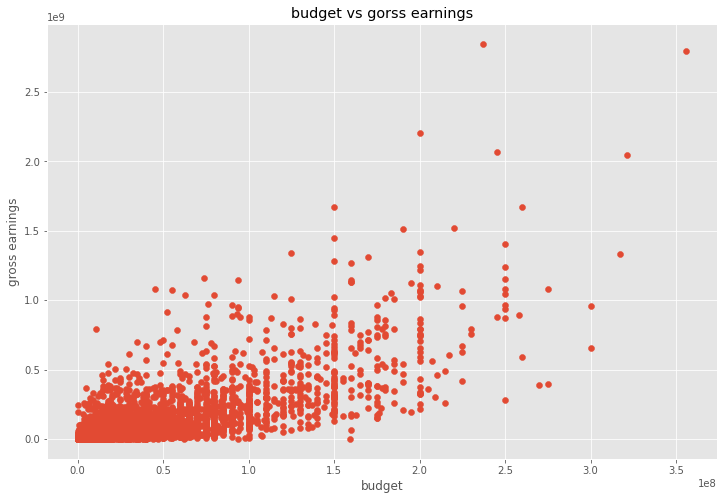

In [85]:
plt.scatter(x='budget',y='gross',data = df)
plt.title("budget vs gorss earnings")
plt.xlabel("budget")
plt.ylabel("gross earnings")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

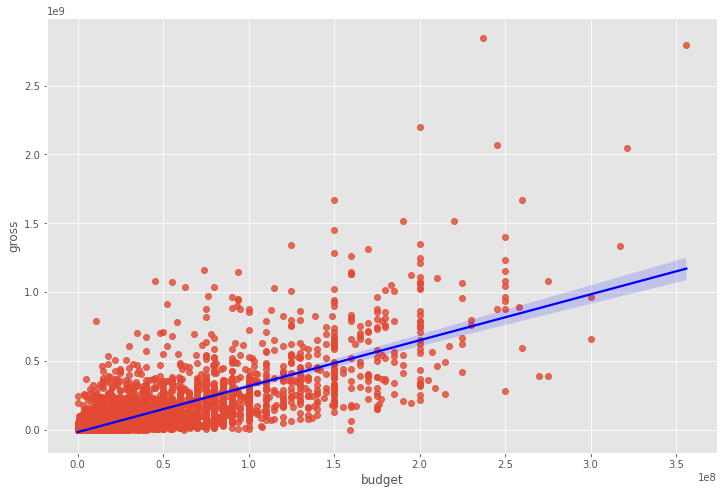

In [86]:
sns.regplot(x='budget',y='gross',data=df ,line_kws={"color":"blue"})

## Correlations

In [87]:
df.corr()

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
yearcorrect,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000


Text(87.0, 0.5, 'Movie Features')

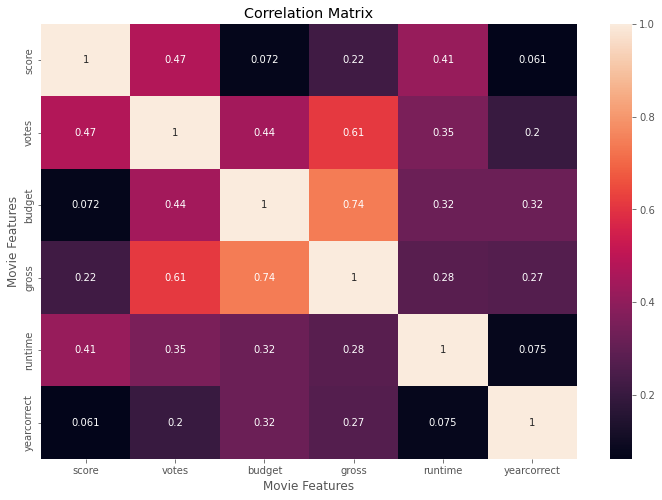

In [89]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [91]:
df_num = df.
for column in df_num.columns:
    if df_num[column].dtype=="object":
        df_num[column] = df_num[column].astype("category")
        df_num[column] = df_num[column].cat.codes
df_num

,released,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,1297,4679,6,6,8.4,927000.0,1791,2828,694,46,19000000,46998772,1420,146.0,1980
1,1120,3917,6,1,5.8,65000.0,1574,1155,213,47,4500000,58853106,448,104.0,1980
2,1352,3630,4,0,8.7,1200000.0,754,1815,1151,47,18000000,538375067,940,124.0,1980
3,1120,204,4,4,7.7,221000.0,885,1410,1467,47,3500000,83453539,1103,88.0,1980
4,1163,732,6,4,7.3,108000.0,716,349,270,47,6000000,39846344,1078,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,898,415,6,0,6.6,140000.0,16,2386,1805,47,90000000,426505244,448,124.0,2020
5403,707,3545,4,0,6.5,102000.0,848,2305,146,47,85000000,319715683,1103,99.0,2020
5404,898,1150,4,1,5.6,53000.0,1805,2823,1463,47,175000000,245487753,1391,101.0,2020
5405,752,3966,4,1,6.8,42000.0,293,2087,635,6,135000000,111105497,12,100.0,2020


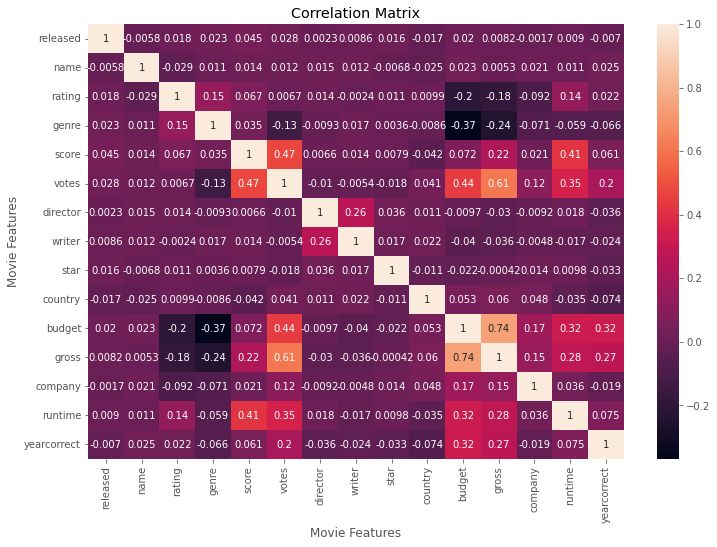

In [95]:
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [106]:
pd.set_option('display.max_rows', None)

In [109]:
corr_mat = df_num.corr()
corr_pairs = corr_mat.unstack()
corr_pairs.sort_values(ascending=False)

released     released       1.000000
name         name           1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
gross        budget         0.740028
budget       gross          0.740028
gross        votes          0.614432
votes        gross          0.614432
score        votes          0.474594
votes        score          0.474594
budget       votes          0.439077
votes        budget         0.439077
score        runtime        0.414501
runtime      score          0.414501
votes        runtime        0.352263
runtime      votes          0.352263
y